In [142]:
import pandas as pd

In [98]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\merged_dataset.csv')

In [108]:
df.head()

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Recency,Purchase_Frequency,Total_Spending,Product_Name,Product_Price_y,Price_Range,Company_Name,Company_Profit,Address,Profitability_Category,Region
0,1.00,88.00,6.00,11.00,2024-03-26,194379.15,1075200.00,216.00,82.00,128878400.00,RevenueVue Dashboard,179200.00,High,Elite Consulting 88,75950.00,"EDSA, Barangay 456, Taguig, Philippines",Medium,Barangay 456
1,6.00,80.00,11.00,4.00,2021-07-12,160658.68,627200.00,1204.00,90.00,150315200.00,OptiFlow Automation,156800.00,High,Green Partners 80,111227.00,"Commonwealth Ave, Barangay 202, Manila, Philip...",High,Barangay 202
2,7.00,50.00,10.00,14.00,2023-11-01,133548.75,1960000.00,362.00,82.00,127898400.00,SegmentX Targeting,89600.00,Medium,Sky Associates 50,32118.00,"Alabang-Zapote Rd, Brgy. 303, Baguio, Philippines",Low,Brgy. 303
3,5005.00,57.00,10.00,6.00,2022-07-10,131297.78,627200.00,841.00,72.00,96924800.00,SegmentX Targeting,89600.00,Medium,Pioneer Corp 57,118114.00,"Katipunan ave, barangay 456, parañaque, philip...",High,barangay 456
4,21.00,88.00,13.00,11.00,2024-09-08,210759.80,392000.00,50.00,82.00,128878400.00,ForecastXcelerator,196000.00,High,Elite Consulting 88,75950.00,"EDSA, Barangay 456, Taguig, Philippines",Medium,Barangay 456


In [122]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df = df.sort_values('Transaction_Date')

# Set the datetime column as the index
df.set_index('Transaction_Date', inplace=True)

In [124]:
# Generate descriptive statistics for the dataset
df.describe()

,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price_x,Total_Cost,Recency,Purchase_Frequency,Total_Spending,Product_Price_y,Company_Profit
count,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00,2102.00
mean,5093.52,52.80,10.14,10.62,135097.53,1441166.13,733.36,81.86,129265809.71,131024.55,71518.92
std,2757.50,26.94,5.53,5.50,37618.97,873223.30,416.96,8.26,15257382.29,39878.81,27799.52
min,1.00,1.00,1.00,0.00,75819.60,84000.00,0.00,60.00,86553600.00,84000.00,30663.00
25%,2921.25,31.00,6.00,6.00,102846.66,772800.00,373.00,77.00,120097600.00,89600.00,49158.00
50%,5005.00,50.00,10.00,11.00,131297.78,1344000.00,729.00,82.00,127898400.00,128800.00,74653.00
75%,7408.50,76.00,14.00,15.00,161308.14,1904000.00,1095.00,86.00,136651200.00,168000.00,95710.25
max,9999.00,100.00,20.00,21.00,246276.23,4480000.00,1460.00,107.00,175616000.00,224000.00,118114.00


### Data Preprocessing
In this step, the dataset is loaded and the `Transaction_Date` column is converted into a datetime format using the `pd.to_datetime` method. 
This allows us to handle the time series data more effectively. After that, the data is sorted based on `Transaction_Date`, and the column is set as 
the index of the DataFrame to make it more suitable for time series analysis. 

The target variable, `Total_Spending`, which is the focus of our forecasting, is extracted for further analysis.

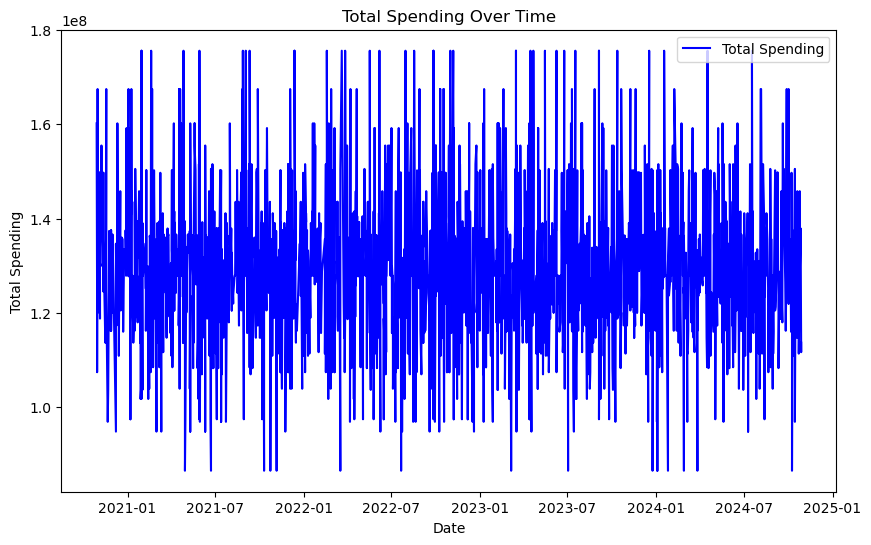

In [126]:
import matplotlib.pyplot as plt

# Visualizing the distribution of 'Total_Spending' over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total_Spending'], label='Total Spending', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.title('Total Spending Over Time')
plt.legend()
plt.show()


### Visualizing Total Spending Over Time
The plot below shows the total spending over time, which is crucial to observe trends, fluctuations, and potential seasonality in the data. The blue line represents the historical data of total spending for each transaction date, providing an overview of how the spending has varied over time. By visualizing this, we can observe patterns that will assist in the modeling and forecasting process.


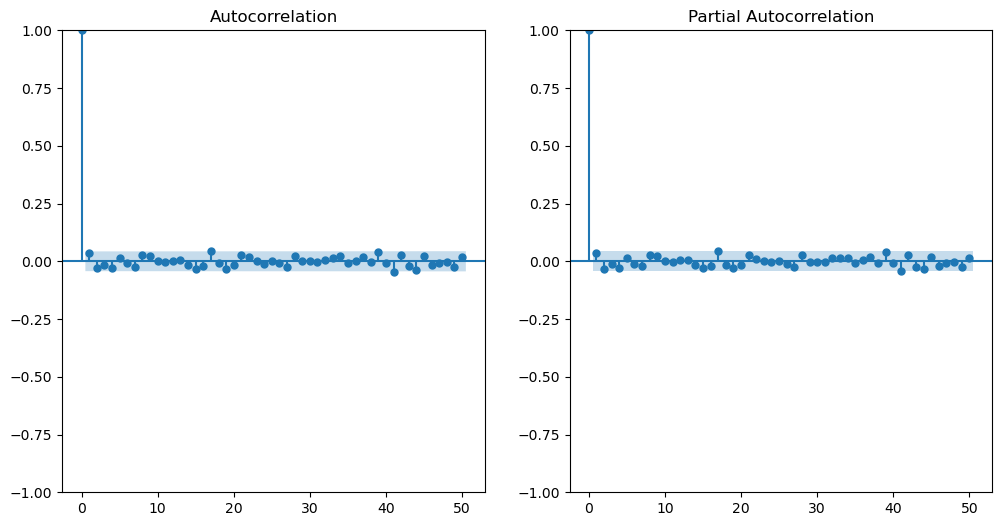

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for the 'Total_Spending' data
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Total_Spending'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Total_Spending'], lags=50, ax=plt.gca())
plt.show()

### Autocorrelation and Partial Autocorrelation Plots
Autocorrelation (ACF) and partial autocorrelation (PACF) plots are essential for identifying the order of the AR (AutoRegressive) and MA (Moving Average) components of the ARIMA model. These plots help us understand the relationship between the time series data and its own past values.

- The ACF plot shows how the series is correlated with its lags.
- The PACF plot helps in identifying the number of AR terms that should be included in the model.

By analyzing these plots, we can determine the optimal lags (p, q, P, Q) to be used in the SARIMA model.


In [130]:
import statsmodels.api as sm

# Fit a SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['Total_Spending'],
                                         order=(1, 1, 1),  # Adjust based on ACF/PACF analysis
                                         seasonal_order=(1, 1, 1, 12),  # Monthly data seasonality
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)

# Fit the SARIMA model
sarima_result = sarima_model.fit(disp=False)

# Print the summary of the SARIMA model
print(sarima_result.summary())

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Total_Spending   No. Observations:                 2102
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -37731.701
Date:                            Thu, 13 Mar 2025   AIC                          75473.402
Time:                                    21:53:48   BIC                          75501.590
Sample:                                         0   HQIC                         75483.733
                                           - 2102                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0195      0.048     -0.405      0.686      -0.114       0.075
ma.L1         -0.8001      0.024   

C:\Users\DELL\AppData\Local\Temp\ipykernel_30280\180233841.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:]
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


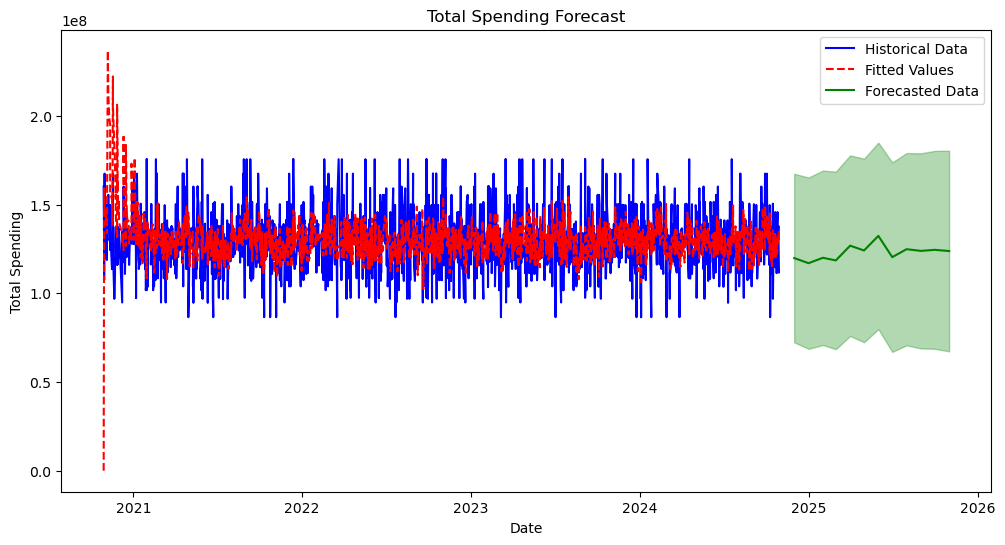

In [132]:
# Forecasting future values
forecast_steps = 12
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the historical data, fitted values, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total_Spending'], label='Historical Data', color='blue')
plt.plot(df.index, sarima_result.fittedvalues, label='Fitted Values', color='red', linestyle='--')
plt.plot(forecast_index, forecast_mean, label='Forecasted Data', color='green')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3)
plt.title('Total Spending Forecast')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend()
plt.show()

### Model Fitting
In this step, we use the SARIMA model, which stands for Seasonal Autoregressive Integrated Moving Average. This model is specifically designed to handle time series data with seasonal patterns, making it a great choice for forecasting FinMark’s sales.

We fit the model with the following parameters:

(1, 1, 1): These parameters represent the autoregressive (AR), differencing (I), and moving average (MA) terms for the non-seasonal part of the model. The numbers indicate the order of each part, helping the model account for past values, trends, and noise in the data.

(1, 1, 12): This part of the model specifies the seasonal order. The first two numbers, 1 and 1, are for the seasonal autoregressive and differencing terms, while the 12 indicates the seasonal period (12 months, which is common for yearly seasonal patterns).

These choices were made based on examining the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots, which indicate the dependencies in the data that need to be captured by the model. By using these seasonal and non-seasonal components, we can effectively model the underlying patterns in FinMark's sales data.

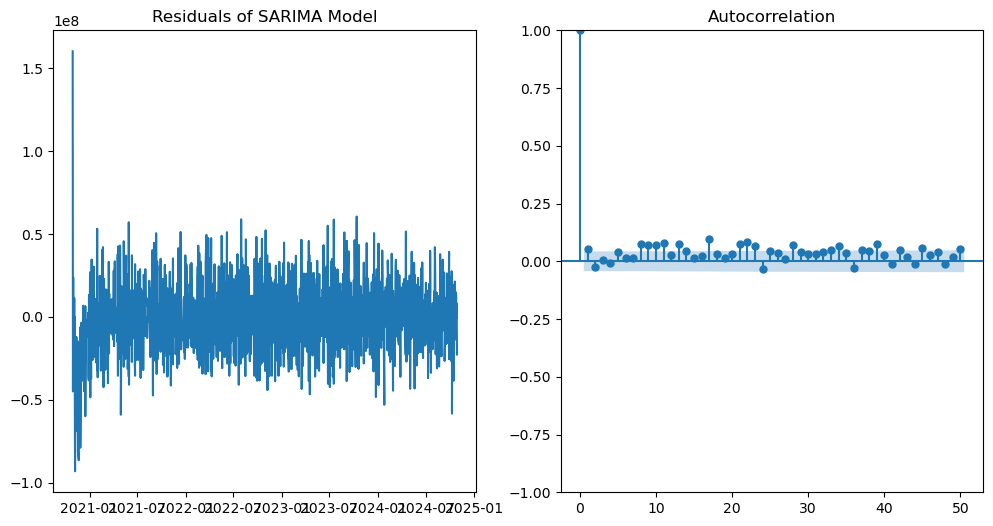

In [136]:
# Plot the residuals of the SARIMA model
residuals = sarima_result.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of SARIMA Model')

plt.subplot(122)
plot_acf(residuals, lags=50, ax=plt.gca())
plt.show()


### Residual Analysis
After fitting the model, it’s important to assess its performance through residual analysis. Residuals are the differences between the actual and predicted values. By examining them, we can evaluate how well the model is capturing the underlying patterns in the data. Ideally, residuals should resemble white noise, which means they don’t show any remaining patterns that the model hasn’t captured.

Autocorrelation of residuals: The second plot shows the autocorrelation of residuals. Ideally, we want the residuals to be random (not correlated). If there are any patterns in the residuals, it would suggest that the model has not captured all the dependencies in the data.
By ensuring that the residuals are randomly distributed and exhibit no autocorrelation, we confirm that the SARIMA model has appropriately modeled the time series data.


### Forecasting FinMark's Sales for the Next 6 Months
Based on the SARIMA model's forecast, we predict FinMark's total spending for the next six months. The forecast is plotted alongside the historical data and the fitted values from the model. The forecasted values (green line) give an indication of how the total spending is expected to evolve in the near future.

This forecast is valuable for decision-making, as it helps FinMark plan for the upcoming months, make informed strategic decisions, and anticipate market trends based on the predicted spending behavior.
